In [9]:
import os,sys
import argparse
import copy

import numpy as np
from iminuit import Minuit
import pandas as pd
from scipy import interpolate, integrate
from astropy import units as u
from astropy.coordinates import SkyCoord, Distance
import healpy as hp
from tqdm import *

sys.path.append('../')


from local_dirs import *
from minuit_functions import call_ll

# Additional modules
sys.path.append(nptf_old_dir)
sys.path.append(work_dir + '/AccurateSmoothing')
sys.path.append(work_dir + '/mkDMMaps')

import fermi.fermi_plugin as fp
import LL_inten_to_xsec as Litx

# NPTFit modules
from NPTFit import nptfit # module for performing scan
from NPTFit import create_mask as cm # module for creating the mask

In [10]:
from scan import Scan
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import healpy as hp

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
# # Global settings
# nside=128
# eventclass=5 # 2 (Source) or 5 (UltracleanVeto)
# eventtype=0 # 0 (all), 3 (bestpsf) or 5 (top3 quartiles)
# diff = 'p7' # 'p6', 'p7', 'p8'
# emin = 0
# emax = 39

# # Load the Fermi plugin
# f_global = fp.fermi_plugin(maps_dir,fermi_data_dir=fermi_data_dir,work_dir=work_dir,CTB_en_min=emin,CTB_en_max=emax+1,nside=nside,eventclass=eventclass,eventtype=eventtype,newstyle=1,data_July16=True)

In [14]:
sc =Scan(perform_scan=1, 
    perform_postprocessing=0, 
    imc=0, 
    iobj=3, 
    Asimov=0, 
    float_ps_together=0,
    noJprof=0,
    floatDM=1,
    verbose=1,
    emin=0,
     emax=5,
     load_dir='/tigress/bsafdi/github/NPTF-working/NPTF-ID-Catalog/SimpleScan/data/debugging_together//',
    save_dir='/tigress/bsafdi/github/NPTF-working/NPTF-ID-Catalog/SimpleScan/data/debugging_together///',
    mc_dm=-1)

0it [00:00, ?it/s]

At bin 0


FCN = 4246.97666945 
 TOTAL NCALL = 2830 
 NCALLS = 2830 
 
 
 EDM = 0.000269323977239 
 GOAL EDM = 1e-06 
 
 UP = 0.1 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 True 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,p7,1.21571,0.0390049,0,0,0.0,50.0,
2,iso,8.74952,0.272129,0,0,0.0,50.0,
3,DM,0.000147531,45.1074,0,0,0.0,1000.0,
4,ps_1895,0.704969,0.664773,0,0,0.0,50.0,
5,ps_1905,0.621982,0.231592,0,0,0.0,50.0,
6,ps_1932,1.53627,0.199942,0,0,0.0,50.0,
7,ps_1963,0.706433,0.186054,0,0,0.0,50.0,
8,ps_1969,1.08836,3.16794,0,0,0.0,50.0,
9,ps_2029,0.663934,0.261835,0,0,0.0,50.0,
10,ps_2032,0.000480017,0.680051,0,0,0.0,50.0,


1it [00:04,  4.41s/it]

At bin 1


FCN = 4169.64640308 
 TOTAL NCALL = 2175 
 NCALLS = 2175 
 
 
 EDM = 0.000215635702979 
 GOAL EDM = 1e-06 
 
 UP = 0.1 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 True 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,p7,1.12437,0.0365914,0,0,0.0,50.0,
2,iso,7.05786,0.230379,0,0,0.0,50.0,
3,DM,4.19835,70.5363,0,0,0.0,1000.0,
4,ps_1895,4.87378e-06,0.107891,0,0,0.0,50.0,
5,ps_1905,0.750467,0.201597,0,0,0.0,50.0,
6,ps_1932,1.30451,0.172707,0,0,0.0,50.0,
7,ps_1963,1.32565,0.203444,0,0,0.0,50.0,
8,ps_1969,2.83862,2.37572,0,0,0.0,50.0,
9,ps_2029,0.94356,0.248722,0,0,0.0,50.0,
10,ps_2032,0.00026975,0.411568,0,0,0.0,50.0,


2it [00:07,  3.96s/it]

At bin 2


FCN = 4032.276843 
 TOTAL NCALL = 2453 
 NCALLS = 2453 
 
 
 EDM = 9.23787956348e-05 
 GOAL EDM = 1e-06 
 
 UP = 0.1 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,p7,0.971632,0.0314198,0,0,0.0,50.0,
2,iso,6.63539,0.192126,0,0,0.0,50.0,
3,DM,9.16911,22.2564,0,0,0.0,1000.0,
4,ps_1895,1.21435,0.509912,0,0,0.0,50.0,
5,ps_1905,1.16107,0.186875,0,0,0.0,50.0,
6,ps_1932,1.15841,0.158793,0,0,0.0,50.0,
7,ps_1963,0.883597,0.207459,0,0,0.0,50.0,
8,ps_1969,3.31871,1.79592,0,0,0.0,50.0,
9,ps_2029,0.411911,0.228305,0,0,0.0,50.0,
10,ps_2032,0.800116,0.614307,0,0,0.0,50.0,


3it [00:10,  3.68s/it]

At bin 3


FCN = 3964.60800847 
 TOTAL NCALL = 2712 
 NCALLS = 2712 
 
 
 EDM = 4.51246285829e-05 
 GOAL EDM = 1e-06 
 
 UP = 0.1 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,p7,1.1104,0.0305621,0,0,0.0,50.0,
2,iso,4.47591,0.174164,0,0,0.0,50.0,
3,DM,45.2473,17.8745,0,0,0.0,1000.0,
4,ps_1895,0.222524,0.447648,0,0,0.0,50.0,
5,ps_1905,0.56108,0.15694,0,0,0.0,50.0,
6,ps_1932,1.19353,0.156102,0,0,0.0,50.0,
7,ps_1963,0.964949,0.230934,0,0,0.0,50.0,
8,ps_1969,1.73901,1.43236,0,0,0.0,50.0,
9,ps_2029,1.36691,0.244124,0,0,0.0,50.0,
10,ps_2032,1.17742,0.494408,0,0,0.0,50.0,


4it [00:13,  3.53s/it]

At bin 4


FCN = 3803.21550938 
 TOTAL NCALL = 1881 
 NCALLS = 1881 
 
 
 EDM = 2.6984580398e-05 
 GOAL EDM = 1e-06 
 
 UP = 0.1 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,p7,0.987662,0.0290637,0,0,0.0,50.0,
2,iso,3.7895,0.150304,0,0,0.0,50.0,
3,DM,6.4837e-11,3.89701,0,0,0.0,1000.0,
4,ps_1895,1.02691,0.423453,0,0,0.0,50.0,
5,ps_1905,0.968917,0.159329,0,0,0.0,50.0,
6,ps_1932,0.59327,0.130782,0,0,0.0,50.0,
7,ps_1963,0.920581,0.24067,0,0,0.0,50.0,
8,ps_1969,0.7733,1.09792,0,0,0.0,50.0,
9,ps_2029,1.21617,0.23824,0,0,0.0,50.0,
10,ps_2032,1.72002,0.39453,0,0,0.0,50.0,


5it [00:17,  3.52s/it]

At bin 5


FCN = 3652.39895439 
 TOTAL NCALL = 2649 
 NCALLS = 2649 
 
 
 EDM = 4.95022624225e-05 
 GOAL EDM = 1e-06 
 
 UP = 0.1 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,p7,1.02426,0.0301679,0,0,0.0,50.0,
2,iso,2.83902,0.132303,0,0,0.0,50.0,
3,DM,2.55079,10.0438,0,0,0.0,1000.0,
4,ps_1895,0.466893,0.382195,0,0,0.0,50.0,
5,ps_1905,0.992684,0.161046,0,0,0.0,50.0,
6,ps_1932,0.823317,0.131663,0,0,0.0,50.0,
7,ps_1963,1.32323,0.270095,0,0,0.0,50.0,
8,ps_1969,3.01709,0.954554,0,0,0.0,50.0,
9,ps_2029,1.87942,0.264637,0,0,0.0,50.0,
10,ps_2032,0.899393,0.323836,0,0,0.0,50.0,


6it [00:20,  3.40s/it]


In [5]:
sc =Scan(perform_scan=1, 
    perform_postprocessing=0, 
    imc=0, 
    iobj=0, 
    Asimov=0, 
    float_ps_together=0,
    noJprof=0,
    floatDM=1,
    verbose=1,
    emin=0,
     emax=5,
     load_dir='/tigress/bsafdi/github/NPTF-working/NPTF-ID-Catalog/SimpleScan/data/debugging_together//',
    save_dir='/tigress/bsafdi/github/NPTF-working/NPTF-ID-Catalog/SimpleScan/data/debugging_together///',
    mc_dm=-1)

../scan.py:91: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  source_3fg_df = source_3fg_df.convert_objects(convert_numeric=True)
0it [00:00, ?it/s]

At bin 0


FCN = 5442.62450373 
 TOTAL NCALL = 19290 
 NCALLS = 19290 
 
 
 EDM = 0.000117087350717 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 False 
 False 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 True 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,p7,1.19676,0.00525103,0,0,0.0,50.0,
2,iso,8.30023,0.301431,0,0,0.0,50.0,
3,bub,0.3,33.517,0,0,0.0,50.0,
4,DM,3.71359e-06,85.4618,0,0,0.0,1000.0,
5,ps_154,1.04789,0.428335,0,0,0.0,50.0,
6,ps_166,1.52467,0.255568,0,0,0.0,50.0,
7,ps_170,1.63119,0.489094,0,0,0.0,50.0,
8,ps_171,0.822291,0.333728,0,0,0.0,50.0,
9,ps_174,1.98187e-05,8.9418,0,0,0.0,50.0,
10,ps_175,0.000124713,1.83508,0,0,0.0,50.0,


1it [00:16, 16.01s/it]

At bin 1


FCN = 5311.79803094 
 TOTAL NCALL = 15648 
 NCALLS = 15648 
 
 
 EDM = 0.000102929085673 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 False 
 False 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 True 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,p7,1.13788,0.00503871,0,0,0.0,50.0,
2,iso,7.08418,0.285215,0,0,0.0,50.0,
3,bub,0.3,33.517,0,0,0.0,50.0,
4,DM,49.224,141.799,0,0,0.0,1000.0,
5,ps_154,0.869723,0.374295,0,0,0.0,50.0,
6,ps_166,0.000146706,1.62078,0,0,0.0,50.0,
7,ps_170,0.871476,0.48278,0,0,0.0,50.0,
8,ps_171,0.538022,0.292942,0,0,0.0,50.0,
9,ps_174,3.79642,0.622228,0,0,0.0,50.0,
10,ps_175,0.92951,0.352205,0,0,0.0,50.0,


2it [00:26, 14.50s/it]

At bin 2


FCN = 5249.81969062 
 TOTAL NCALL = 14898 
 NCALLS = 14898 
 
 
 EDM = 0.000126755792919 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 False 
 False 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 True 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,p7,1.12707,0.00501562,0,0,0.0,50.0,
2,iso,5.6389,0.272588,0,0,0.0,50.0,
3,bub,0.3,33.517,0,0,0.0,50.0,
4,DM,0.000558101,973.903,0,0,0.0,1000.0,
5,ps_154,1.00104,0.34668,0,0,0.0,50.0,
6,ps_166,0.698592,0.280725,0,0,0.0,50.0,
7,ps_170,1.02491,0.479726,0,0,0.0,50.0,
8,ps_171,0.242699,0.256432,0,0,0.0,50.0,
9,ps_174,2.04567,0.471195,0,0,0.0,50.0,
10,ps_175,0.405268,0.310503,0,0,0.0,50.0,


3it [00:37, 13.41s/it]

At bin 3


FCN = 5235.43476871 
 TOTAL NCALL = 13959 
 NCALLS = 13959 
 
 
 EDM = 0.000146277624177 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 False 
 False 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 True 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,p7,1.06422,0.00502207,0,0,0.0,50.0,
2,iso,4.48395,0.255285,0,0,0.0,50.0,
3,bub,0.3,33.517,0,0,0.0,50.0,
4,DM,23.0246,93.3614,0,0,0.0,1000.0,
5,ps_154,1.21272,0.334292,0,0,0.0,50.0,
6,ps_166,0.000410524,3.13586,0,0,0.0,50.0,
7,ps_170,0.95531,0.467859,0,0,0.0,50.0,
8,ps_171,0.627471,0.235808,0,0,0.0,50.0,
9,ps_174,2.55071,0.383069,0,0,0.0,50.0,
10,ps_175,1.51739,0.285908,0,0,0.0,50.0,


4it [00:47, 12.41s/it]

At bin 4


FCN = 5106.33675575 
 TOTAL NCALL = 12295 
 NCALLS = 12295 
 
 
 EDM = 0.000169864793189 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,p7,1.05844,0.0107771,0,0,0.0,50.0,
2,iso,3.39582,0.432846,0,0,0.0,50.0,
3,bub,0.3,33.517,0,0,0.0,50.0,
4,DM,0.00077233,13.8738,0,0,0.0,1000.0,
5,ps_154,1.21941,0.299686,0,0,0.0,50.0,
6,ps_166,0.532696,0.884267,0,0,0.0,50.0,
7,ps_170,1.66263,0.380979,0,0,0.0,50.0,
8,ps_171,1.11554,0.331786,0,0,0.0,50.0,
9,ps_174,1.3656,0.7661,0,0,0.0,50.0,
10,ps_175,1.25281,0.644339,0,0,0.0,50.0,


5it [00:56, 11.41s/it]

At bin 5


FCN = 4925.83621113 
 TOTAL NCALL = 10701 
 NCALLS = 10701 
 
 
 EDM = 6.11588546757e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 False 
 False 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 True 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,p7,1.04148,0.00550813,0,0,0.0,50.0,
2,iso,2.90453,0.218381,0,0,0.0,50.0,
3,bub,0.3,33.517,0,0,0.0,50.0,
4,DM,16.0338,56.1025,0,0,0.0,1000.0,
5,ps_154,0.230745,0.310193,0,0,0.0,50.0,
6,ps_166,1.19665,0.333378,0,0,0.0,50.0,
7,ps_170,0.923679,0.451524,0,0,0.0,50.0,
8,ps_171,0.821928,0.208415,0,0,0.0,50.0,
9,ps_174,1.05868,0.264796,0,0,0.0,50.0,
10,ps_175,0.923106,0.245519,0,0,0.0,50.0,


6it [01:05, 10.47s/it]


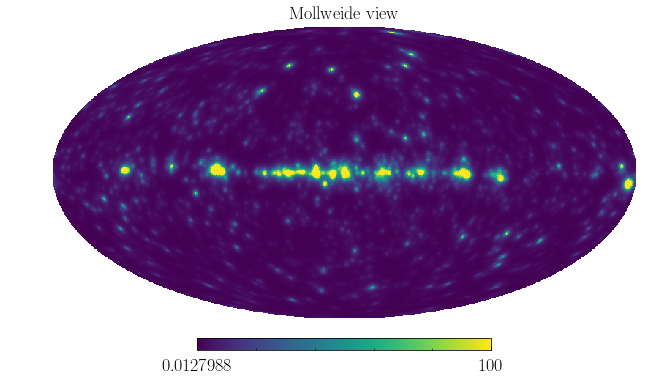

In [83]:
hp.mollview(np.load(additional_data_dir + 'ps_map.npy')[0],max=100)

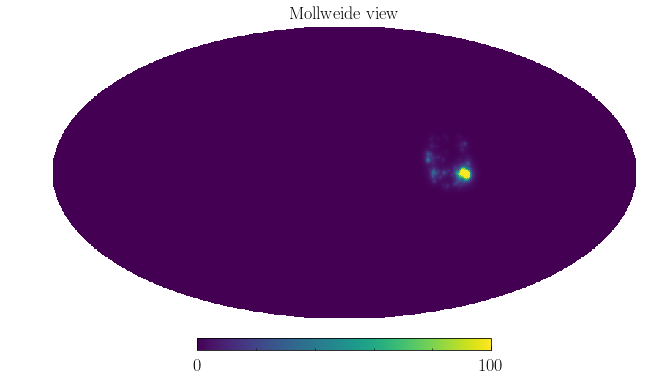

In [84]:
hp.mollview(sc.ps_map_subthresh,max=100)

In [85]:
iobj = 0
catalog = pd.read_csv("../data/Catalogs//DarkSky_ALL_200,200,200_v3.csv")
l_obj = catalog.l.values[iobj]
b_obj = catalog.b.values[iobj]

In [86]:
source_3fg_df = pd.read_csv(additional_data_dir + '3fgl.dat', sep='|', comment='#')
source_3fg_df.rename(columns=lambda x: x.strip(), inplace=True) # Strip whitespace
for col in source_3fg_df.columns.values:
    try:
        source_3fg_df[col] = source_3fg_df[col].map(str.strip)
    except TypeError:
        continue
source_3fg_df = source_3fg_df.convert_objects(convert_numeric=True)


/tigress/smsharma/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


  0%|          | 0/1 [00:00<?, ?it/s]

Sigma is 25.479654 arcmin (0.007412 rad) 
-> fwhm is 60.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


100%|██████████| 1/1 [00:00<00:00,  2.21it/s]


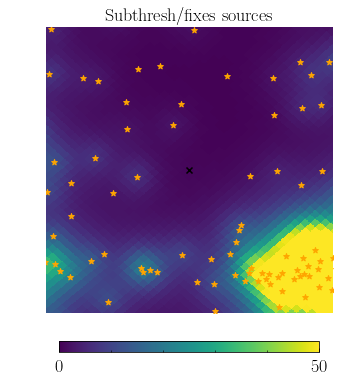

In [87]:
oFig1 = plt.figure(1,figsize=(10,80))

lbrange = 10


for ie in tqdm(range(1)):
    the_map = sc.ps_map_subthresh

    hp.cartview(hp.smoothing(the_map,1.*np.pi/180.), min=0, max = 50, rot=(l_obj,b_obj), lonra=[-lbrange,lbrange],latra=[-lbrange,lbrange], title="Subthresh/fixes sources")
    
    hp.projscatter(l_obj, b_obj, lonlat=True, coord='G', marker='x', color='k')


    l = source_3fg_df['_Lii']
    b =source_3fg_df['_Bii']

    hp.projscatter(l, b, lonlat=True, coord='G', marker='*', color='orange')




  0%|          | 0/1 [00:00<?, ?it/s]

Sigma is 25.479654 arcmin (0.007412 rad) 
-> fwhm is 60.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


100%|██████████| 1/1 [00:00<00:00,  1.26it/s]


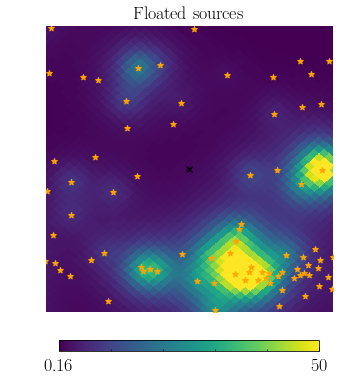

In [88]:
oFig1 = plt.figure(1,figsize=(10,80))


for ie in tqdm(range(1)):
    the_map = np.load(additional_data_dir + 'ps_map.npy')[0] - sc.ps_map_subthresh

    hp.cartview(hp.smoothing(the_map,1.*np.pi/180.), max=50, rot=(l_obj,b_obj), lonra=[-lbrange,lbrange],latra=[-lbrange,lbrange], title="Floated sources")
    
    hp.projscatter(l_obj, b_obj, lonlat=True, coord='G', marker='x', color='k')

    l = source_3fg_df['_Lii']
    b =source_3fg_df['_Bii']

    hp.projscatter(l, b, lonlat=True, coord='G', marker='*', color='orange')





In [6]:
Scan(perform_scan=1, 
    perform_postprocessing=1, 
    imc=0, 
    iobj=0, 
    Asimov=0, 
    float_ps_together=1,
    noJprof=0,
    floatDM=1,
    verbose=1,
    emin=0,
     emax=25,
     load_dir='/tigress/bsafdi/github/NPTF-working/NPTF-ID-Catalog/SimpleScan/data/debugging_together//',
    save_dir='/tigress/bsafdi/github/NPTF-working/NPTF-ID-Catalog/SimpleScan/data/debugging_together///',
    mc_dm=-1,
    TS_thresh = 3000)


0it [00:00, ?it/s]

At bin 0


FCN = 5459.45163261 
 TOTAL NCALL = 230 
 NCALLS = 230 
 
 
 EDM = 1.22957741189e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,p7,1.18803,0.00963786,0,0,0.0,20.0,
2,iso,8.83201,0.448547,0,0,0.0,20.0,
3,bub,1.90735e-05,14.2106,0,0,0.0,20.0,
4,DM,0.00148895,58.6347,0,0,0.0,1000.0,
5,psc,1.00955,0.0274855,0,0,0.0,20.0,


adding p7 to background
adding iso to background
adding bub to background
adding psc to background



1it [00:02,  2.00s/it]

At bin 1


FCN = 5326.84119787 
 TOTAL NCALL = 279 
 NCALLS = 279 
 
 
 EDM = 5.27950033275e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,p7,1.13488,0.0084156,0,0,0.0,20.0,
2,iso,6.83475,0.433569,0,0,0.0,20.0,
3,bub,1.90735e-05,14.2106,0,0,0.0,20.0,
4,DM,107.148,159.111,0,0,0.0,1000.0,
5,psc,0.939126,0.0251392,0,0,0.0,20.0,


adding p7 to background
adding iso to background
adding bub to background
adding psc to background




2it [00:04,  2.09s/it]

At bin 2


FCN = 5275.9903902 
 TOTAL NCALL = 341 
 NCALLS = 341 
 
 
 EDM = 8.58724978641e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,p7,1.11246,0.00821887,0,0,0.0,20.0,
2,iso,5.77581,0.401269,0,0,0.0,20.0,
3,bub,1.90735e-05,14.2106,0,0,0.0,20.0,
4,DM,44.5811,110.131,0,0,0.0,1000.0,
5,psc,0.964172,0.0230994,0,0,0.0,20.0,


adding p7 to background
adding iso to background
adding bub to background
adding psc to background



3it [00:06,  2.10s/it]

At bin 3


FCN = 5255.35345844 
 TOTAL NCALL = 280 
 NCALLS = 280 
 
 
 EDM = 1.47620789704e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 False 
 False 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 True 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,p7,1.06094,0.00502166,0,0,0.0,20.0,
2,iso,4.62068,0.255482,0,0,0.0,20.0,
3,bub,1.90735e-05,14.2106,0,0,0.0,20.0,
4,DM,24.0099,89.1541,0,0,0.0,1000.0,
5,psc,1.03801,0.0180097,0,0,0.0,20.0,


adding p7 to background
adding iso to background
adding bub to background
adding psc to background



4it [00:08,  2.02s/it]

At bin 4


FCN = 5125.38695099 
 TOTAL NCALL = 344 
 NCALLS = 344 
 
 
 EDM = 4.89970976509e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 False 
 False 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 True 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,p7,1.05921,0.00521587,0,0,0.0,20.0,
2,iso,3.55324,0.238847,0,0,0.0,20.0,
3,bub,1.90735e-05,14.2106,0,0,0.0,20.0,
4,DM,0.00110472,186.07,0,0,0.0,1000.0,
5,psc,1.07889,0.0182621,0,0,0.0,20.0,


adding p7 to background
adding iso to background
adding bub to background
adding psc to background



5it [00:09,  1.93s/it]

At bin 5


FCN = 4953.67604116 
 TOTAL NCALL = 351 
 NCALLS = 351 
 
 
 EDM = 3.58019335657e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,p7,1.03826,0.00814516,0,0,0.0,20.0,
2,iso,2.81908,0.299703,0,0,0.0,20.0,
3,bub,1.90735e-05,14.2106,0,0,0.0,20.0,
4,DM,26.0508,57.6545,0,0,0.0,1000.0,
5,psc,1.08318,0.0204074,0,0,0.0,20.0,


adding p7 to background
adding iso to background
adding bub to background
adding psc to background



6it [00:11,  1.90s/it]

At bin 6


FCN = 4801.00295872 
 TOTAL NCALL = 266 
 NCALLS = 266 
 
 
 EDM = 1.59072379313e-07 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,p7,1.01293,0.00856188,0,0,0.0,20.0,
2,iso,2.1635,0.280435,0,0,0.0,20.0,
3,bub,1.90735e-05,14.2106,0,0,0.0,20.0,
4,DM,5.91581e-07,60.4201,0,0,0.0,1000.0,
5,psc,1.09991,0.0206537,0,0,0.0,20.0,


adding p7 to background
adding iso to background
adding bub to background
adding psc to background



7it [00:13,  1.83s/it]

At bin 7


FCN = 4659.34118664 
 TOTAL NCALL = 286 
 NCALLS = 286 
 
 
 EDM = 1.18859169609e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,p7,1.00379,0.00919931,0,0,0.0,20.0,
2,iso,1.45565,0.248084,0,0,0.0,20.0,
3,bub,1.90735e-05,14.2106,0,0,0.0,20.0,
4,DM,26.9543,33.274,0,0,0.0,1000.0,
5,psc,1.11002,0.0210094,0,0,0.0,20.0,


adding p7 to background
adding iso to background
adding bub to background
adding psc to background



8it [00:15,  1.89s/it]

At bin 8


FCN = 4447.43281468 
 TOTAL NCALL = 227 
 NCALLS = 227 
 
 
 EDM = 6.0335636804e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,p7,0.98501,0.0103019,0,0,0.0,20.0,
2,iso,0.873491,0.212173,0,0,0.0,20.0,
3,bub,1.90735e-05,14.2106,0,0,0.0,20.0,
4,DM,0.0183997,2.64002,0,0,0.0,1000.0,
5,psc,1.08492,0.0223542,0,0,0.0,20.0,


adding p7 to background
adding iso to background
adding bub to background
adding psc to background



9it [00:17,  1.93s/it]

At bin 9


FCN = 4237.33959908 
 TOTAL NCALL = 235 
 NCALLS = 235 
 
 
 EDM = 1.53123234859e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,p7,0.974588,0.0110888,0,0,0.0,20.0,
2,iso,0.596829,0.178733,0,0,0.0,20.0,
3,bub,1.90735e-05,14.2106,0,0,0.0,20.0,
4,DM,13.3211,19.1684,0,0,0.0,1000.0,
5,psc,1.03482,0.0204763,0,0,0.0,20.0,


adding p7 to background
adding iso to background
adding bub to background
adding psc to background



10it [00:19,  1.91s/it]

At bin 10


FCN = 4017.33386737 
 TOTAL NCALL = 219 
 NCALLS = 219 
 
 
 EDM = 0.000181375184292 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,p7,0.929036,0.0127355,0,0,0.0,20.0,
2,iso,0.728867,0.155227,0,0,0.0,20.0,
3,bub,1.90735e-05,14.2106,0,0,0.0,20.0,
4,DM,6.49066e-05,10.5736,0,0,0.0,1000.0,
5,psc,1.01708,0.0265569,0,0,0.0,20.0,


adding p7 to background
adding iso to background
adding bub to background
adding psc to background



11it [00:21,  1.92s/it]

At bin 11


FCN = 3762.69375632 
 TOTAL NCALL = 219 
 NCALLS = 219 
 
 
 EDM = 1.47690511969e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,p7,0.979201,0.0153055,0,0,0.0,20.0,
2,iso,0.35743,0.127905,0,0,0.0,20.0,
3,bub,1.90735e-05,14.2106,0,0,0.0,20.0,
4,DM,0.00410735,3.80278,0,0,0.0,1000.0,
5,psc,1.03395,0.0319443,0,0,0.0,20.0,


adding p7 to background
adding iso to background
adding bub to background
adding psc to background



12it [00:23,  1.89s/it]

At bin 12


FCN = 3490.85728988 
 TOTAL NCALL = 207 
 NCALLS = 207 
 
 
 EDM = 0.00015810678139 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,p7,0.999455,0.0184875,0,0,0.0,20.0,
2,iso,0.383049,0.10528,0,0,0.0,20.0,
3,bub,1.90735e-05,14.2106,0,0,0.0,20.0,
4,DM,0.00524121,3.04806,0,0,0.0,1000.0,
5,psc,0.965335,0.0380972,0,0,0.0,20.0,


adding p7 to background
adding iso to background
adding bub to background
adding psc to background


KeyboardInterrupt: 

In [17]:
Scan(perform_scan=1, 
    perform_postprocessing=1, 
    imc=0, 
    iobj=0, 
    Asimov=0, 
    float_ps_together=1,
    noJprof=0,
    floatDM=1,
    verbose=1,
    emin=0,
     emax=25,
     load_dir='/tigress/bsafdi/github/NPTF-working/NPTF-ID-Catalog/SimpleScan/data/debugging_indiv//',
    save_dir='/tigress/bsafdi/github/NPTF-working/NPTF-ID-Catalog/SimpleScan/data/debugging_indiv///',
    mc_dm=-1)



0it [00:00, ?it/s]

At bin 0


FCN = 5459.4517342 
 TOTAL NCALL = 323 
 NCALLS = 323 
 
 
 EDM = 0.000114248737853 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,p7,1.188,0.00952027,0,0,0.0,50.0,
2,iso,8.83629,0.443535,0,0,0.0,50.0,
3,bub,4.76837e-05,35.5266,0,0,0.0,50.0,
4,DM,0.00141959,83.7434,0,0,0.0,1000.0,
5,psc,1.00942,0.0271098,0,0,0.0,50.0,





1it [00:03,  3.89s/it]

At bin 1


FCN = 5326.84126366 
 TOTAL NCALL = 349 
 NCALLS = 349 
 
 
 EDM = 6.45502676175e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 False 
 False 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 True 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,p7,1.13488,0.00503877,0,0,0.0,50.0,
2,iso,6.83393,0.285089,0,0,0.0,50.0,
3,bub,4.76837e-05,35.5266,0,0,0.0,50.0,
4,DM,108.17,148.373,0,0,0.0,1000.0,
5,psc,0.939281,0.0182325,0,0,0.0,50.0,




2it [00:08,  4.05s/it]

At bin 2


FCN = 5275.99031884 
 TOTAL NCALL = 379 
 NCALLS = 379 
 
 
 EDM = 4.78169162985e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 False 
 False 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 True 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,p7,1.11244,0.00501561,0,0,0.0,50.0,
2,iso,5.77631,0.27319,0,0,0.0,50.0,
3,bub,4.76837e-05,35.5266,0,0,0.0,50.0,
4,DM,43.8438,115.299,0,0,0.0,1000.0,
5,psc,0.964228,0.0180282,0,0,0.0,50.0,




3it [00:13,  4.26s/it]

At bin 3


FCN = 5255.35353481 
 TOTAL NCALL = 291 
 NCALLS = 291 
 
 
 EDM = 7.86678614223e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,p7,1.06091,0.00798333,0,0,0.0,50.0,
2,iso,4.62003,0.352029,0,0,0.0,50.0,
3,bub,4.76837e-05,35.5266,0,0,0.0,50.0,
4,DM,24.7329,83.0303,0,0,0.0,1000.0,
5,psc,1.03808,0.0222445,0,0,0.0,50.0,




4it [00:17,  4.37s/it]

At bin 4


FCN = 5125.38694228 
 TOTAL NCALL = 298 
 NCALLS = 298 
 
 
 EDM = 3.65318951303e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 False 
 False 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 True 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,p7,1.05928,0.00521603,0,0,0.0,50.0,
2,iso,3.55251,0.238858,0,0,0.0,50.0,
3,bub,4.76837e-05,35.5266,0,0,0.0,50.0,
4,DM,0.00401866,187.638,0,0,0.0,1000.0,
5,psc,1.07888,0.0182621,0,0,0.0,50.0,




5it [00:22,  4.42s/it]

At bin 5


FCN = 4953.67604131 
 TOTAL NCALL = 316 
 NCALLS = 316 
 
 
 EDM = 1.33735127861e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,p7,1.03825,0.00827125,0,0,0.0,50.0,
2,iso,2.81937,0.308145,0,0,0.0,50.0,
3,bub,4.76837e-05,35.5266,0,0,0.0,50.0,
4,DM,26.0411,59.3392,0,0,0.0,1000.0,
5,psc,1.0832,0.020722,0,0,0.0,50.0,




6it [00:25,  4.21s/it]

At bin 6


FCN = 4801.00304063 
 TOTAL NCALL = 259 
 NCALLS = 259 
 
 
 EDM = 7.2252278514e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,p7,1.01288,0.00844564,0,0,0.0,50.0,
2,iso,2.16473,0.266827,0,0,0.0,50.0,
3,bub,4.76837e-05,35.5266,0,0,0.0,50.0,
4,DM,0.00175428,57.3258,0,0,0.0,1000.0,
5,psc,1.10002,0.0202198,0,0,0.0,50.0,




7it [00:31,  4.50s/it]

At bin 7


KeyboardInterrupt: 

In [16]:
Scan(perform_scan=1, 
    perform_postprocessing=1, 
    imc=0, 
    iobj=0, 
    Asimov=0, 
    float_ps_together=1,
    noJprof=0,
    floatDM=1,
    verbose=1,
    emin=0,
     emax=25,
     load_dir='/tigress/bsafdi/github/NPTF-working/NPTF-ID-Catalog/SimpleScan/data/debugging_indiv//',
    save_dir='/tigress/bsafdi/github/NPTF-working/NPTF-ID-Catalog/SimpleScan/data/debugging_indiv///',
    mc_dm=-1)


0it [00:00, ?it/s]

At bin 0


FCN = 5466.16079188 
 TOTAL NCALL = 332 
 NCALLS = 332 
 
 
 EDM = 5.15481555637e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,p7,1.1729,0.00772295,0,0,0.0,10.0,
2,iso,10,0.00237248,0,0,0.0,10.0,
3,bub,9.53674e-06,7.10531,0,0,0.0,10.0,
4,DM,2.93593e-05,49.7726,0,0,0.0,1000.0,
5,psc,1.01033,0.0274644,0,0,0.0,10.0,



1it [00:02,  2.85s/it]

At bin 1


FCN = 5326.8412316 
 TOTAL NCALL = 500 
 NCALLS = 500 
 
 
 EDM = 5.40108701275e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 False 
 False 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 True 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,p7,1.13488,0.00503879,0,0,0.0,10.0,
2,iso,6.83642,0.284949,0,0,0.0,10.0,
3,bub,9.53674e-06,7.10531,0,0,0.0,10.0,
4,DM,106.68,148.541,0,0,0.0,1000.0,
5,psc,0.939178,0.0182322,0,0,0.0,10.0,




2it [00:05,  2.86s/it]

At bin 2


FCN = 5275.99033052 
 TOTAL NCALL = 442 
 NCALLS = 442 
 
 
 EDM = 2.02361864319e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,p7,1.11245,0.0083722,0,0,0.0,10.0,
2,iso,5.77606,0.399903,0,0,0.0,10.0,
3,bub,9.53674e-06,7.10531,0,0,0.0,10.0,
4,DM,44.0216,116.02,0,0,0.0,1000.0,
5,psc,0.964175,0.0227032,0,0,0.0,10.0,



3it [00:08,  2.78s/it]

At bin 3


FCN = 5463.14262371 
 TOTAL NCALL = 284 
 NCALLS = 284 
 
 
 EDM = 0.000111719154356 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,p7,0.989268,0.00611608,0,0,0.0,10.0,
2,iso,10,0.00575346,0,0,0.0,10.0,
3,bub,9.53674e-06,7.10531,0,0,0.0,10.0,
4,DM,8.09011e-06,17.3804,0,0,0.0,1000.0,
5,psc,1.04492,0.0221519,0,0,0.0,10.0,



4it [00:10,  2.60s/it]

At bin 4


FCN = 5125.38728211 
 TOTAL NCALL = 351 
 NCALLS = 351 
 
 
 EDM = 3.12480217982e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 False 
 False 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 True 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,p7,1.05927,0.00521595,0,0,0.0,10.0,
2,iso,3.55151,0.238782,0,0,0.0,10.0,
3,bub,9.53674e-06,7.10531,0,0,0.0,10.0,
4,DM,0.0779122,186.14,0,0,0.0,1000.0,
5,psc,1.07888,0.018262,0,0,0.0,10.0,



5it [00:13,  2.68s/it]

At bin 5


FCN = 4953.67604474 
 TOTAL NCALL = 363 
 NCALLS = 363 
 
 
 EDM = 5.86683215356e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,p7,1.03826,0.00804047,0,0,0.0,10.0,
2,iso,2.81925,0.297656,0,0,0.0,10.0,
3,bub,9.53674e-06,7.10531,0,0,0.0,10.0,
4,DM,26.1636,56.2628,0,0,0.0,1000.0,
5,psc,1.0832,0.0203146,0,0,0.0,10.0,



6it [00:15,  2.66s/it]

At bin 6


FCN = 4801.00295906 
 TOTAL NCALL = 285 
 NCALLS = 285 
 
 
 EDM = 4.25544755593e-07 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,p7,1.01293,0.00860245,0,0,0.0,10.0,
2,iso,2.1634,0.272728,0,0,0.0,10.0,
3,bub,9.53674e-06,7.10531,0,0,0.0,10.0,
4,DM,1.62994e-06,14.8757,0,0,0.0,1000.0,
5,psc,1.09992,0.0206375,0,0,0.0,10.0,



7it [00:18,  2.61s/it]

At bin 7


FCN = 4659.34118376 
 TOTAL NCALL = 282 
 NCALLS = 282 
 
 
 EDM = 1.31052219118e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,p7,1.00378,0.00910298,0,0,0.0,10.0,
2,iso,1.45563,0.233638,0,0,0.0,10.0,
3,bub,9.53674e-06,7.10531,0,0,0.0,10.0,
4,DM,27.0369,37.204,0,0,0.0,1000.0,
5,psc,1.11003,0.0212785,0,0,0.0,10.0,



8it [00:20,  2.48s/it]

At bin 8


FCN = 4447.32434601 
 TOTAL NCALL = 350 
 NCALLS = 350 
 
 
 EDM = 3.82426890109e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,p7,0.985037,0.00998799,0,0,0.0,10.0,
2,iso,0.866152,0.20189,0,0,0.0,10.0,
3,bub,9.53674e-06,7.10531,0,0,0.0,10.0,
4,DM,8.52954,23.255,0,0,0.0,1000.0,
5,psc,1.08517,0.0216788,0,0,0.0,10.0,



9it [00:22,  2.39s/it]

At bin 9


FCN = 4237.33957727 
 TOTAL NCALL = 245 
 NCALLS = 245 
 
 
 EDM = 4.47825307594e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,p7,0.974589,0.0113375,0,0,0.0,10.0,
2,iso,0.59644,0.180944,0,0,0.0,10.0,
3,bub,9.53674e-06,7.10531,0,0,0.0,10.0,
4,DM,13.3383,18.0983,0,0,0.0,1000.0,
5,psc,1.03474,0.0243252,0,0,0.0,10.0,



10it [00:25,  2.46s/it]

At bin 10


FCN = 4017.33363391 
 TOTAL NCALL = 255 
 NCALLS = 255 
 
 
 EDM = 3.22927281789e-07 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,p7,0.929101,0.0128595,0,0,0.0,10.0,
2,iso,0.729926,0.156871,0,0,0.0,10.0,
3,bub,9.53674e-06,7.10531,0,0,0.0,10.0,
4,DM,4.76514e-06,2.54483,0,0,0.0,1000.0,
5,psc,1.01686,0.0274878,0,0,0.0,10.0,



11it [00:28,  2.70s/it]

At bin 11


FCN = 3762.69366775 
 TOTAL NCALL = 234 
 NCALLS = 234 
 
 
 EDM = 9.28290383741e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,p7,0.979065,0.0152573,0,0,0.0,10.0,
2,iso,0.358769,0.131825,0,0,0.0,10.0,
3,bub,9.53674e-06,7.10531,0,0,0.0,10.0,
4,DM,6.14813e-05,2.60786,0,0,0.0,1000.0,
5,psc,1.03378,0.0326786,0,0,0.0,10.0,



12it [00:33,  3.40s/it]

At bin 12


FCN = 3490.8567593 
 TOTAL NCALL = 260 
 NCALLS = 260 
 
 
 EDM = 7.15476347854e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,p7,0.999431,0.018714,0,0,0.0,10.0,
2,iso,0.383195,0.112846,0,0,0.0,10.0,
3,bub,9.53674e-06,7.10531,0,0,0.0,10.0,
4,DM,0.000513106,2.41332,0,0,0.0,1000.0,
5,psc,0.9652,0.0404631,0,0,0.0,10.0,



13it [00:37,  3.43s/it]

At bin 13


FCN = 3158.9695029 
 TOTAL NCALL = 201 
 NCALLS = 201 
 
 
 EDM = 7.1749134552e-07 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,p7,1.02705,0.0228852,0,0,0.0,10.0,
2,iso,0.177033,0.0926078,0,0,0.0,10.0,
3,bub,9.53674e-06,7.10531,0,0,0.0,10.0,
4,DM,3.01814e-10,2.29538,0,0,0.0,1000.0,
5,psc,1.0279,0.0516319,0,0,0.0,10.0,



14it [00:41,  3.58s/it]

At bin 14


FCN = 2923.37753148 
 TOTAL NCALL = 222 
 NCALLS = 222 
 
 
 EDM = 1.27867088121e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,p7,1.07667,0.029116,0,0,0.0,10.0,
2,iso,0.126501,0.0825347,0,0,0.0,10.0,
3,bub,9.53674e-06,7.10531,0,0,0.0,10.0,
4,DM,2.18012,6.12703,0,0,0.0,1000.0,
5,psc,1.02986,0.0667025,0,0,0.0,10.0,



15it [00:44,  3.36s/it]

At bin 15


FCN = 2549.95307911 
 TOTAL NCALL = 253 
 NCALLS = 253 
 
 
 EDM = 1.02011332704e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,p7,0.991787,0.0331406,0,0,0.0,10.0,
2,iso,0.215314,0.0648401,0,0,0.0,10.0,
3,bub,9.53674e-06,7.10531,0,0,0.0,10.0,
4,DM,1.96977e-06,1.72493,0,0,0.0,1000.0,
5,psc,1.04033,0.0819983,0,0,0.0,10.0,



16it [00:46,  3.23s/it]

At bin 16


FCN = 2286.07880243 
 TOTAL NCALL = 240 
 NCALLS = 240 
 
 
 EDM = 0.000105130704417 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 False 
 False 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 True 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,p7,0.974989,0.0284797,0,0,0.0,10.0,
2,iso,0.185535,0.0402812,0,0,0.0,10.0,
3,bub,9.53674e-06,7.10531,0,0,0.0,10.0,
4,DM,3.34248e-06,2.46397,0,0,0.0,1000.0,
5,psc,1.09156,0.110435,0,0,0.0,10.0,



17it [00:50,  3.32s/it]

At bin 17


FCN = 1973.20591655 
 TOTAL NCALL = 221 
 NCALLS = 221 
 
 
 EDM = 3.55530015218e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 False 
 False 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 True 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,p7,1.01987,0.03459,0,0,0.0,10.0,
2,iso,0.093316,0.0327381,0,0,0.0,10.0,
3,bub,9.53674e-06,7.10531,0,0,0.0,10.0,
4,DM,0.310687,4.18943,0,0,0.0,1000.0,
5,psc,0.909677,0.128178,0,0,0.0,10.0,


KeyboardInterrupt: 

In [13]:
LLs = np.load("/tigress/bsafdi/github/NPTF-working/NPTF-ID-Catalog/SimpleScan/data/debugging_together///LL2_TSmx_lim_b_o0_mc0.npz")['LL2']
LLs_indiv = np.load("/tigress/bsafdi/github/NPTF-working/NPTF-ID-Catalog/SimpleScan/data/debugging_indiv///LL2_TSmx_lim_b_o0_mc0.npz")['LL2']
xsecs = np.logspace(-33,-18,301)

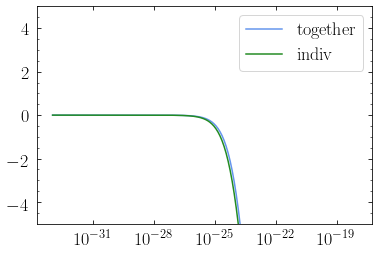

In [14]:
im = 11
plt.plot(xsecs, LLs[im]-LLs[im][0], label="together")
plt.plot(xsecs, LLs_indiv[im]-LLs_indiv[im][0], label="indiv")
plt.ylim(-5,5)
plt.legend()
plt.xscale("log")